In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("Documents/credit_risk.csv")
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [8]:
df['Rate'].fillna(df.Rate.mean(), inplace=True)
df['Emp_length'].fillna(df.Emp_length.mean(), inplace=True)

In [9]:
df = pd.get_dummies(df, columns=['Home', 'Intent'])
df

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Default,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,0,22,59000,123.0,35000,16.02,1,0.59,Y,3,False,False,False,True,False,False,False,False,True,False
1,1,21,9600,5.0,1000,11.14,0,0.10,N,2,False,False,True,False,False,True,False,False,False,False
2,2,25,9600,1.0,5500,12.87,1,0.57,N,3,True,False,False,False,False,False,False,True,False,False
3,3,23,65500,4.0,35000,15.23,1,0.53,N,2,False,False,False,True,False,False,False,True,False,False
4,4,24,54400,8.0,35000,14.27,1,0.55,Y,4,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,1.0,5800,13.16,0,0.11,N,30,True,False,False,False,False,False,False,False,True,False
32577,32577,54,120000,4.0,17625,7.49,0,0.15,N,19,True,False,False,False,False,False,False,False,True,False
32578,32578,65,76000,3.0,35000,10.99,1,0.46,N,28,False,False,False,True,False,False,True,False,False,False
32579,32579,56,150000,5.0,15000,11.48,0,0.10,N,26,True,False,False,False,False,False,False,False,True,False


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(['Default', 'Id'], axis='columns')
y = df['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
model = RandomForestClassifier(n_estimators=35, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=35, random_state=42)

In [13]:
model.score(X_test, y_test)

0.8293693417216511

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(RandomForestClassifier(n_estimators=35, random_state=42), X, y)

array([0.82246432, 0.82980356, 0.815531  , 0.82857581, 0.82074893])

In [15]:
model.fit(X, y)

RandomForestClassifier(n_estimators=35, random_state=42)

In [16]:
model.score(X_test, y_test)

0.9978517722878625

In [17]:
model.score(X, y)

0.9986188269236672

In [18]:
import pickle
with open('Documents/credit_risk_model.pickle', 'wb') as f:
    pickle.dump( model, f)

In [19]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('Documents/credit_risk_columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [25]:
y_pred = model.predict(X_test)

In [21]:
y_test

14668    N
24614    Y
11096    N
10424    N
26007    N
        ..
31330    N
2862     N
14754    N
14170    N
24385    N
Name: Default, Length: 6517, dtype: object

In [22]:
X_test

,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
14668,24,28000,6.0,10000,10.370000,0,0.36,2,False,False,True,False,False,False,True,False,False,False
24614,27,64000,0.0,10000,15.270000,0,0.16,10,False,False,False,True,False,False,False,False,True,False
11096,26,72000,10.0,16000,11.011695,0,0.22,3,True,False,False,False,False,True,False,False,False,False
10424,23,27996,7.0,10000,11.011695,1,0.36,2,False,False,False,True,True,False,False,False,False,False
26007,30,44500,2.0,13000,16.320000,1,0.29,6,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31330,37,88000,20.0,9925,11.011695,0,0.11,16,True,False,False,False,False,False,True,False,False,False
2862,26,64000,2.0,3000,11.011695,0,0.05,4,False,False,False,True,False,False,False,True,False,False
14754,23,114000,4.0,10000,11.011695,0,0.09,2,True,False,False,False,False,False,False,False,True,False
14170,24,100000,1.0,6000,11.011695,0,0.06,3,True,False,False,False,True,False,False,False,False,False


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[5318,    4],
       [  10, 1185]], dtype=int64)

Text(95.72222222222221, 0.5, 'predicted')

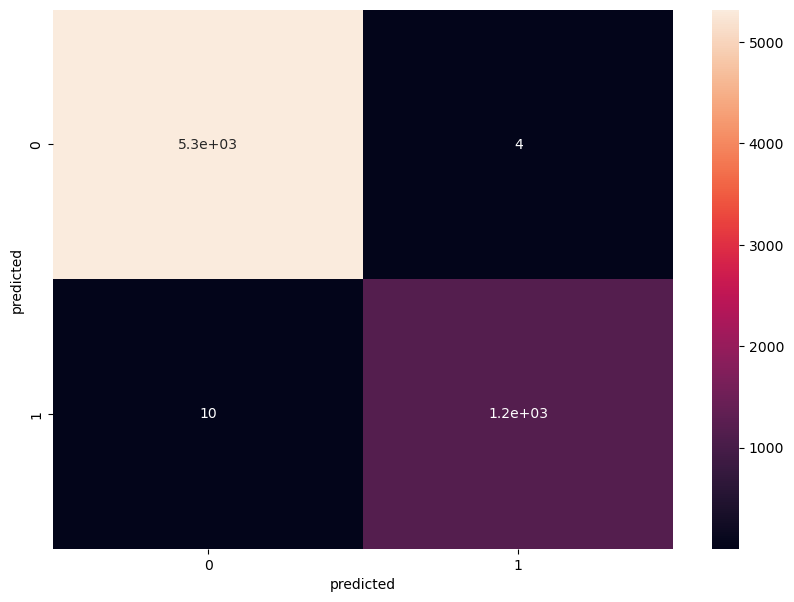

In [27]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("predicted")